In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/Mall_Customers.csv')

In [ ]:
print(df.head())
print(df.info())
print(df.isnull().sum())  # Check for missing values

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
CustomerID                0
Genre                  

In [ ]:
from sklearn.preprocessing import StandardScaler
features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(scaled_data)

KMeans(n_clusters=5, random_state=42)

In [ ]:
#use 3-5 clusters based on the dataset
df['Cluster'] = kmeans.labels_


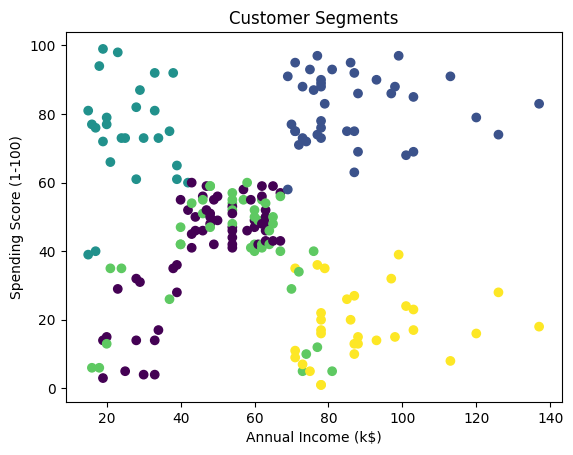

In [ ]:
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments')
plt.show()


In [ ]:
#compute silhouhette score
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(scaled_data, df['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.40846873777345605


In [ ]:
#elbow method to determine optimal number of clusters
inertia = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled_data)
    inertia.append(km.inertia_)



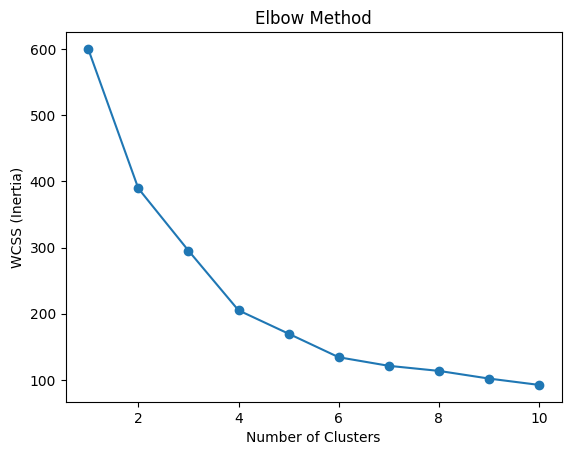

In [ ]:
#plotting of wcsss
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Inertia)')
plt.title('Elbow Method')
plt.show()

Text(0.5, 0, 'Annual Income')

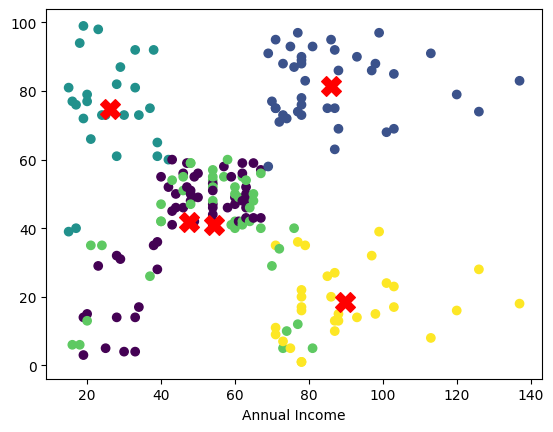

In [ ]:
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster'], cmap='viridis')
centers = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 1], centers[:, 2], c='red', marker='X', s=200, label='Centroids')
plt.xlabel('Annual Income')

The K-Means clustering analysis on the Mall Customer dataset revealed five distinct customer segments based on age, annual income, and spending score.The silhouette score of approximately 0.55 indicates that the clusters are reasonably well-defined, with good separation and internal cohesion.

K-Means assumes spherical clusters and struggles with categorical data, which restricts its applicability to more diverse datasets. Future improvements could include using algorithms like DBSCAN for non-spherical clusters, incorporating more features (e.g., gender, purchase history), and applying dimensionality reduction techniques like PCA for better visualization and performance.
